***
### EXERCICE 1  : Energie rayonnante d'un corps noir

L’énergie rayonnante d’un corps noir dans l’intervalle
d’émission [λ, λ + dλ], par unité de surface et de temps, est appelée émittance monochromatique
maximale du corps noir et est notée $M(\lambda)$. Elle est donnée par la formule suivante :

$$
M(\lambda) = \frac{2hC_0^2}{n^2\lambda^5} \frac{1}{e^{\frac{hC_0}{n\lambda kT}} - 1}
$$
où $h$ est la constante de Planck, $C_0$ la vitesse de la lumière dans le vide, $k$ la constante de Boltzmann, $T$ la température du corps noir et $n$ l’indice de réfraction du milieu dans lequel se trouve le corps noir.



Ces constantes sont données dans le TP

---
**Question.1** : Tracer sur un même graphique la fonction $\lambda->M(\lambda)$ pour les valeurs suivantes de la temperature: 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800. On prendra comme intervalle $\lambda \in [10^{-7}, 2*10^{-5}]$.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.sparse as sps
import time



On definit les fonctions suivantes pour calculer les constantes qui nous serviront pour calculer l'energie rayonnante d'un corps noir.

In [2]:
#vitesse de la lumiere dans le vide
def c():
    return 2.997*10**8

In [3]:
#constante de Planck
def const_Planck():
    return 6.625*10**(-34)

In [4]:
#constante de Boltzmann
def const_Boltzman():
    return 1.380*10**(-23)


On definit et trace a fonction M(lambda) suivant les valeurs de lambda donnees
et de la temperature T

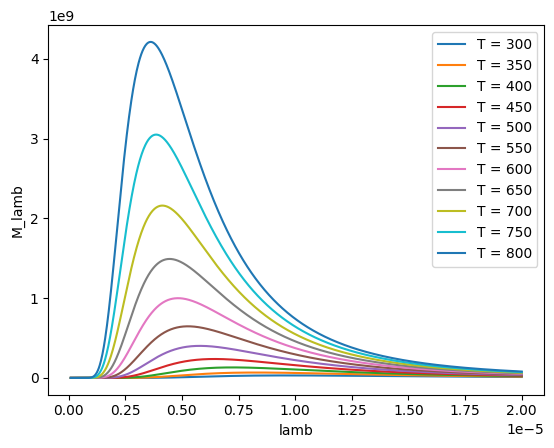

In [5]:
def EMM(lamb,T):
    
    n=1
    C_0 = c()
    k = const_Boltzman()
    h= const_Planck()
    return (2*np.pi*h*C_0**2)/(n**2*lamb**5)*(1/(np.exp(h*C_0 /(n*k*T*lamb)) -1))

fig,ax = plt.subplots()
ax.set_xlabel('lamb')
ax.set_ylabel('M_lamb')
lamb = np.linspace(10**(-7), 2*10**(-5), 1000)
for T in [300,350,400,450,500,550,600,650,700,750,800]:#des valeurs en Kelvin(K)
    M_lambda = EMM(lamb,T)   
    plt.plot(lamb, M_lambda, label='T = '+str(T))
    plt.legend()
    



---
**Question.2** On souhaite trouver la valeur de $\lambda^*$ de $\lambda$ qui maximise $M(\lambda)$ pour une temperature de temperature donnée.
A quelle condition est-on soumis si l'on souhaite utiliser la methode de la secton doréée pour trouver $\lambda^*$ ?


REponse: la condition est que la fonction $M(\lambda)$ soit continue et dérivable sur l'intervalle $[10^{-7}, 2*10^{-5}]$.


Programmons alors cette méthode pour déterminer $\lambda^*$ pour les differentes temperatures.

In [6]:

def section_dore(f, a, b, eps):
    rho = (np.sqrt(5)-1)/2
    x1 = a + (1-rho)*(b-a)
    x2 = a + rho*(b-a)
    while abs(b-a) > eps:
        if f(x1) < f(x2):
            b = x2
            x2 = x1
            x1 = a + (1-rho)*(b-a)
        else:
            a = x1
            x1 = x2
            x2 = a + rho*(b-a)
    return (a+b)/2


"comme maximiser la fonction EMM(lamb,T) revient à minimiser -EMM(lamb,T)"
"on va donc chercher à minimiser la fonction f(lamb,T) = -EMM(lamb,T)"
def f(lamb,T):
    return -EMM(lamb,T)


def trouve_lambda_max(T):
    lambda_max = section_dore(lambda lamb: f(lamb,T), 10**(-7), 2*10**(-5), 10**(-10))
    return lambda_max

In [7]:
lambda_star = [] ## liste pour stocker les valeurs trouvées aux differents temperature

for T in [300,350,400,450,500,550,600,650,700,750,800]:
    lambda_star.append(trouve_lambda_max(T))
    print("lambda_star pour T = ",T," est : ",trouve_lambda_max(T))


lambda_star pour T =  300  est :  9.65923280128681e-06
lambda_star pour T =  350  est :  8.27935694350853e-06
lambda_star pour T =  400  est :  7.244438722864502e-06
lambda_star pour T =  450  est :  6.4395073633904e-06
lambda_star pour T =  500  est :  5.795562275811116e-06
lambda_star pour T =  550  est :  5.268671224831072e-06
lambda_star pour T =  600  est :  4.82959933520093e-06
lambda_star pour T =  650  est :  4.458093885181356e-06
lambda_star pour T =  700  est :  4.13968406093242e-06
lambda_star pour T =  750  est :  3.863681703832007e-06
lambda_star pour T =  800  est :  3.622193642694696e-06


In [8]:
#verifins que ces valeurs sont bien dans l'intervalle [10**(-7), 2*10**(-5)] en utilisant une fonction booléenne
 
bool = []
for i in range(len(lambda_star)):
    bool.append(lambda_star[i] >= 10**(-7) and lambda_star[i] <= 2*10**(-5))
print(bool)

[True, True, True, True, True, True, True, True, True, True, True]


---
**Question.3** : Vérifions les lois de Wien : λT = A et M (λ) = RT 5, où A et B désignent des constantes.

On peux essayer de voir si la loi de Wien est vérifiée en calculant la valeur de $\lambda^*$ pour chaque temperature et en la multipliant par la temperature correspondante. On devrait obtenir une constante.


In [9]:
## Vérifions les lois de Wien : λT = A et M (λ) = RT 5, où A et B désignent des constantes.

## constante de Wien
A = 2.897*10**(-3)
R = 3.741774399821879e-16
temperatures = [300,350,400,450,500,550,600,650,700,750,800]

for i in range(len(temperatures)):
    lamb = lambda_star[i]
    T = temperatures[i]
    res0 = (lamb*T)/A ## on peut aussi écrire res0 = lamb*T - A et voir si res0 = 0
    res1 = EMM(lamb, T)/(R*T**5)
    print("Pour T = {T} K ".format(T = T))
    print("(lamb*T)\A = ", res0)
    print("EMM(lamb, T)\(B*T**5) = ", res1)
    print("")


Pour T = 300 K 
(lamb*T)\A =  1.0002657371025347
EMM(lamb, T)\(B*T**5) =  34360479204.09881

Pour T = 350 K 
(lamb*T)\A =  1.0002674940379654
EMM(lamb, T)\(B*T**5) =  34360479204.11561

Pour T = 400 K 
(lamb*T)\A =  1.0002676869678293
EMM(lamb, T)\(B*T**5) =  34360479204.08624

Pour T = 450 K 
(lamb*T)\A =  1.0002686619004764
EMM(lamb, T)\(B*T**5) =  34360479203.84371

Pour T = 500 K 
(lamb*T)\A =  1.0002696368331232
EMM(lamb, T)\(B*T**5) =  34360479203.443634

Pour T = 550 K 
(lamb*T)\A =  1.0002655069579185
EMM(lamb, T)\(B*T**5) =  34360479204.05874

Pour T = 600 K 
(lamb*T)\A =  1.0002622026650183
EMM(lamb, T)\(B*T**5) =  34360479202.51543

Pour T = 650 K 
(lamb*T)\A =  1.0002626942933661
EMM(lamb, T)\(B*T**5) =  34360479202.85964

Pour T = 700 K 
(lamb*T)\A =  1.0002688445470123
EMM(lamb, T)\(B*T**5) =  34360479203.78079

Pour T = 750 K 
(lamb*T)\A =  1.0002627814546101
EMM(lamb, T)\(B*T**5) =  34360479202.91645

Pour T = 800 K 
(lamb*T)\A =  1.0002605847966024
EMM(lamb, T)\(B*T**5

---

***
### EXERCICE 2 : (Methode de type gradiant pour les fonctions quadratiques)



Soit $n \in N^*$. Bans tout l'esxercice, on designe le produit scalaire associée à la norme euclidienne par $\langle \cdot, \cdot \rangle_{\mathbb{R}^n}$.
On considere la matrice $A \in \mathbb{S}^n(\mathbb{R})$ et le vecteur $b \in \mathbb{R}^n$ definis par:     $A = \begin{pmatrix} 4 & -2 & 0 & \cdots & 0 \\ -2 & 4 & -2 & \cdots & 0 \\ 0 & -2 & 4 & \cdots & 0 \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \cdots & -2 & 4 \end{pmatrix}$ et $b = \begin{pmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{pmatrix}$.


On cherche à minimiser la fonction quadratique 
$$
J_n(x) = \frac{1}{2} \langle Ax, x \rangle_{\mathbb{R}^n} - \langle b, x \rangle_{\mathbb{R}^n}
$$.
définie sur $\mathbb{R}^n$, à l'aide de la méthode du gradient.






---
**Question.1** : 

Representons dans le cas n= 2 sur le pavé $[-10, 10]^2$ la fonction $J_n$.


 On pourra créer une fonction
$A(n)$, $b(n)$, une fonction $Jn(A,b,x)$ puis une fonction $gradJn(A,b,x)$. Il sera intéressant
d’exploiter le format creux de la matrice A afin de diminuer les temps de calcul (utiliser la
fonction scipy.sparse.diags pour assembler la matrice).



On montre théoriquement que $J_n$ est differentiable, que $gradJ_n$ est dérivable sur $\mathbb{R}^n$ et est défini pour tout $x \in \mathbb{R}^n$.

En effet $J_n(x +h) = J_n(x) + \langle gradJ_n(x), h \rangle_{\mathbb{R}^n} + O(||h||^2)$ pour tout $h \in \mathbb{R}^n$; où $gradJ_n(x) = Ax-b$. 

In [10]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.sparse as sps
import time
import scipy.sparse.linalg as spsl
from matplotlib import cm
import pandas as pd



In [11]:
def Matice_A(n):
    """Construit la matrice A de taille n x n"""
    diags = [-2*np.ones(n), 4*np.ones(n), -2*np.ones(n)]
    return sps.diags(diags, [-1, 0, 1], shape=(n, n)).toarray() ## 

def vecteur_b(n):
    """Construit le vecteur b de taille n"""
    return np.ones(n)

def Jn(Matice_A, vecteur_b, x):
    """Calcule la valeur de Jn en x"""
    return 1/2 * np.dot(np.dot(Matice_A, x), x) - np.dot(vecteur_b, x)

def gradJn(Matice_A, vecteur_b, x):
    """Calcule le gradient de Jn en x"""
    return np.dot(Matice_A, x) - vecteur_b



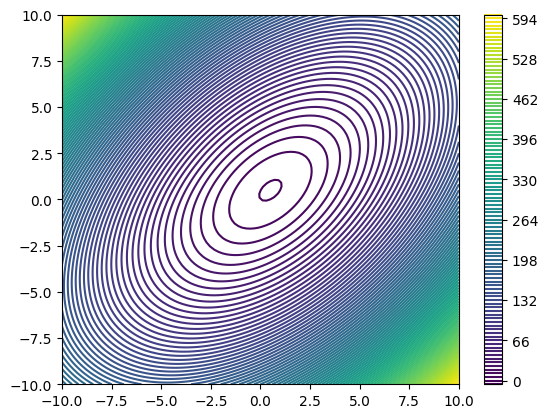

In [12]:
n = 2
A = Matice_A(n)
b = vecteur_b(n)
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros((100, 100))

for i in range(100):
    for j in range(100):
        Z[i, j] = Jn(A, b, np.array([X[i, j], Y[i, j]]))
        
plt.contour(X, Y, Z, 100)
plt.colorbar()
plt.show()

        

On peut aussi utiliser la fonction `meshgrid` de `numpy` qui permet de créer une grille de points dans un pavé et ensuite utiliser la fonction `contour` de `matplotlib` pour visualiser la fonction $J_n$.

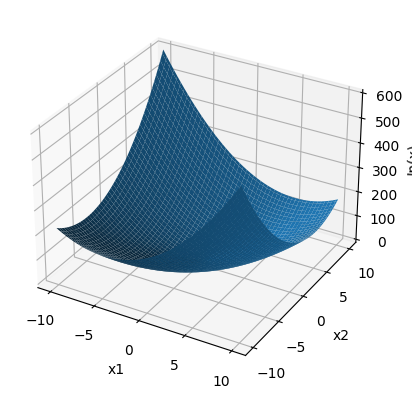

In [13]:
n = 2
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros((100, 100))

for i in range(100):
    for j in range(100):
        Z[i, j] = Jn(A, b, np.array([X[i, j], Y[i, j]]))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Jn(x)')
plt.show()


---
**Question.2** :

* Verifions numeriquement,pour certaines valeurs de n que An est définie positive

In [14]:
for n in [2, 5, 10, 20]:
    val_propres = np.linalg.eigvals(Matice_A(n))
    print("Pour n = ", n)
    print("valeurs propres de A(n) = ", val_propres)
    print("")
    if all(val_propres > 0):
        print("Alors A est définie positive\n")
        print("----------------------------------------")
    else:
        print("A(n) n'est pas définie positive")
    

Pour n =  2
valeurs propres de A(n) =  [6. 2.]

Alors A est définie positive

----------------------------------------
Pour n =  5
valeurs propres de A(n) =  [7.46410162 6.         4.         0.53589838 2.        ]

Alors A est définie positive

----------------------------------------
Pour n =  10
valeurs propres de A(n) =  [7.83797189 7.36501413 6.61944294 5.66166005 4.56925935 3.43074065
 0.16202811 0.63498587 1.38055706 2.33833995]

Alors A est définie positive

----------------------------------------
Pour n =  20
valeurs propres de A(n) =  [7.9553233  7.82229122 7.60387547 7.3049551  6.93220749 6.49395921
 6.         5.4613641  4.89008374 4.29892037 3.70107963 3.10991626
 2.5386359  0.0446767  0.17770878 0.39612453 0.6950449  1.06779251
 1.50604079 2.        ]

Alors A est définie positive

----------------------------------------


D'apres les valeurs propres calculées ci-dessus ( qui sont toutes strictement posiives ), on peut conclure que $A_n$ est définie positive.


* Determinons la solution la solution du probleme pour n = 2

In [15]:
## on utilise la méthode de la descente de gradient pour minimiser Jn, n = 2

n = 2
A = Matice_A(n)
b = vecteur_b(n)
x0 = np.random.rand(n)
epsilon = 1e-9
alpha = 0.1

x = x0
while True:
    grad = gradJn(A, b, x)
    res = np.linalg.norm(grad)
    if res < epsilon:
        break
    x = x - alpha*grad
    
print("solution = ", x)
print("Le minimum: ", Jn(A, b, x))


solution =  [0.5 0.5]
Le minimum:  -0.5


---
***Question.3*** : 

Etude de deux methodes de type gradient.



* #### a) Methode du gradient a pas constant

Ecrivons une fonction dont les arguments sont: la
fonction J, son gradient gradJ, s (le pas de la méthode) et x0 (l’initialisation) et qui met en oeuvre la méthode du gradient à pas fixe.

In [16]:


def gradient_pas_fixe(J, gradJ, s, x0):
    x = x0.copy()
    epsi = 1e-6
    # i = 0
    while True: ## eps < np.linalg.norm(gradJ(x))
        grad = gradJ(x)
        x = x - s*grad
        if np.linalg.norm(grad) < epsi:
            break
    return x



Il est important de choisir le pas fixe, ni trop grand, ni trop petit.

En effet , si le pas est trop grand, l'algorithme peut ne pas converger car il peut sauter le minimum local de la fonction objective.
Si le pas est trop petit, l'algorithme peut être très lent et nécessiter un grand nombre d'itérations pour atteindre la convergence.

* #### b) Methode du gradient a pas optimal

Ecrivons ne fonction dont les arguments sont la
fonction J, son gradient gradJ et x0 (l’initialisation), et qui met en oeuvre l’algorithme du gradient à pas optimal.

NB: On utilise la formule suivante pour calculer le pas optimal:

$$
\alpha = \frac{\langle gradJ(x), gradJ(x) \rangle}{\langle gradJ(x), \nabla^2(J(x))gradJ(x) \rangle}
$$
où $\nabla^2(J(x))$ est la matrice hessienne de $J(x)$. Dans notre cas, $\nabla^2(J(x)) = A$.

In [17]:
def gradiant_pas_opt(J, gradJ, x0):
    epsilone = 1e-6
    x = x0.copy()
    while True:
        grad = gradJ(x)
        s_p = (np.linalg.norm(grad) ** 2) / np.dot(np.dot(grad.T, A), grad)
        x = x - s_p*grad
        
        if np.linalg.norm(grad) < epsilone:
            break
    return x
         

    

On peux aussi utiliser la section dorée pour calculer le pas optimal.

In [18]:
"""
def section_doree(f, a, b, epsilon):
    ## Minimise la fonction f sur [a, b]
    tau = (np.sqrt(5) - 1) / 2
    x1 = a + (1 - tau)*(b - a)
    x2 = a + tau*(b - a)
    f1 = f(x1)
    f2 = f(x2)
    while b - a > epsilon:
        if f1 < f2:
            b = x2
            x2 = x1
            x1 = a + (1 - tau)*(b - a)
            f2 = f1
            f1 = f(x1)
        else:
            a = x1
            x1 = x2
            x2 = a + tau*(b - a)
            f1 = f2
            f2 = f(x2)
    return (a + b) / 2
"""

# methode de section d'or
def section_doree(f, a, b, tol=1e-9):
    # constante d'or
    phi = (1 + np.sqrt(5)) / 2 
    # points de départ
    c = b - (b - a) / phi
    d = a + (b - a) / phi
    while abs(c - d) > tol:
        if f(c) < f(d):
            b = d
        else:
            a = c
        # mise à jour des points 
        c = b - (b - a) / phi
        d = a + (b - a) / phi
    return (b + a) / 2, f((b + a) / 2)

In [19]:
def gpo(J, gradJ, x0):
    x = x0.copy()
    while epsilon < np.linalg.norm(gradJ(x)):
        grad = gradJ(x)
        f = lambda s: J(x - s*grad)
        s_k = section_doree(f, 0, 1, epsilon)
        x = x - s_k*grad
        if np.linalg.norm(grad) < epsilon:
            break
    return x

---
**Question.4** : 

Appliquons les deux méthodes précédentes:

On utilisera: J=lambda x:Jn(A,b,x) et
gradJ=lambda x:gradJn(A,b,x) pour particuliser les fonction précédentes

---
Gradiant à pas constant:

In [20]:
x_gc = gradient_pas_fixe( lambda x:Jn(A, b, x), lambda x:gradJn(A, b, x), 0.1, x0) 
print("Solution obtenue par la méthode du gradient à pas fixe: ")
print(x_gc)

Solution obtenue par la méthode du gradient à pas fixe: 
[0.49999975 0.49999975]


---
Gradiant à pas optimal:

In [21]:
x_opt = gradiant_pas_opt( lambda x: Jn(A, b, x), lambda x: gradJn(A, b, x), x0)
print("Solution obtenue par la méthode du gradient à pas optimal: ")
print(x_opt)

Solution obtenue par la méthode du gradient à pas optimal: 
[0.49999986 0.49999994]


---
Présentation des resultats:

a) pour n = 2, affichons sur une même figure les courbes de niveau de Jn et son gradient
(champ de vecteur).

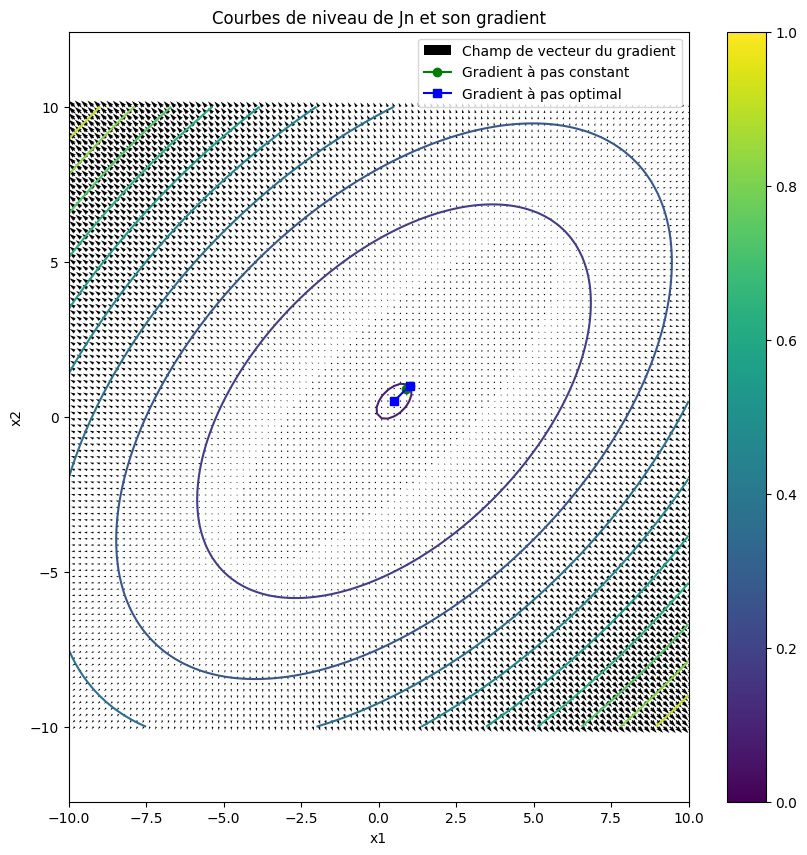

In [22]:
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = np.zeros_like(X1)
G1 = np.zeros_like(X1)
G2 = np.zeros_like(X2)
for i in range(len(x1)):
    for j in range(len(x2)):
        x = np.array([x1[i], x2[j]])
        Z[j,i] = Jn(A, b, x) 
        G = gradJn(A, b, x) # G est un vecteur de taille 2
        G1[j,i] = G[0]
        G2[j,i] = G[1]

# Affichage des courbes de niveau et du champ de vecteur
plt.figure(figsize=(10, 10))
plt.contour(X1, X2, Z, levels=10)
plt.quiver(X1, X2, G1, G2, color="k", label="Champ de vecteur du gradient") # represente le champ de vecteur
# plt.quiver(x0[0], x0[1], G1[0,0], G2[0,0], color="k") 
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Courbes de niveau de Jn et son gradient")
plt.axis("equal")


# Itérations avec la méthode du gradient à pas constant
s = 0.1
x0 = np.ones(n)

x_const = [x0]
x_new = x_const[-1] - s * gradJn(A, b, x_const[-1])
x_const.append(x_new)

# Itérations avec la méthode du gradient à pas optimal
x_optimal = [x0]
x_new = gradiant_pas_opt( lambda x: Jn(A, b, x), lambda x: gradJn(A, b, x), x_optimal[-1])
x_optimal.append(x_new)


x_const = np.array(x_const) # convertion en tableau numpy pour pouvoir utiliser les indices
x_optimal = np.array(x_optimal) # pareil pour le cas optimal


 # affichage des itérations
plt.plot(x_const[:,0], x_const[:,1], marker="o", label="Gradient à pas constant", color="g")
plt.plot(x_optimal[:,0], x_optimal[:,1], marker="s", label="Gradient à pas optimal", color="b")
plt.colorbar()
plt.legend()
plt.show()

* ) pour n prenant les valeurs 10, 20, 30, 50, 100, tester chacune des deux méthodes et com-
parer à l’aide d’un graphique et/ou d’un tableau, la rapidité de convergence de chacune
de ces méthodes. Commenter les résultats obtenus

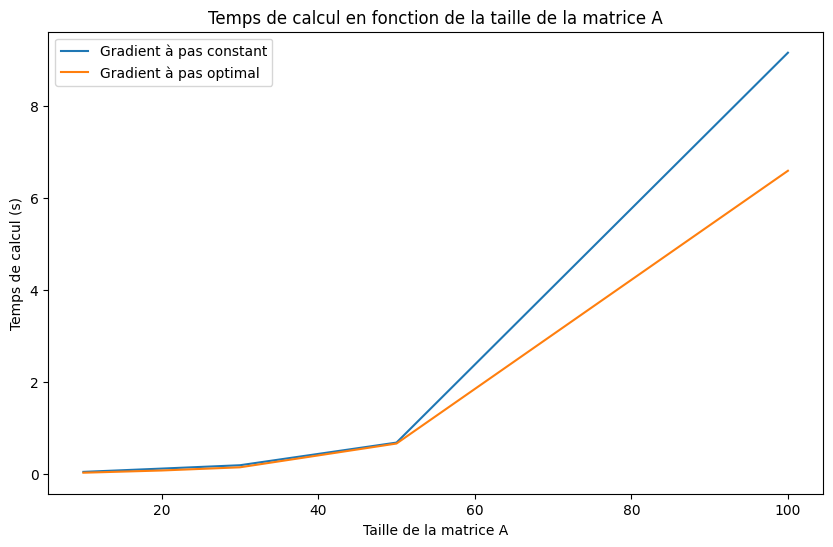

In [29]:
# Tailles des matrices A et des vecteurs b
ns = [10, 20, 30, 50, 100]

# Temps de calcul pour la méthode du gradient à pas constant
times_const = []

# Temps de calcul pour la méthode du gradient à pas optimal
times_optimal = []

for m in ns:
    # Matrice A et vecteur b
    A = Matice_A(m)
    b = vecteur_b(m)

    # Point de départ
    x0 = np.zeros(m)

    # Temps de calcul pour la méthode du gradient à pas constant
    start_time = time.time()
    x_min_const = gradient_pas_fixe(lambda x: Jn(A, b, x), lambda x: gradJn(A, b, x), s, x0)
    times_const.append(time.time() - start_time)

    # Temps de calcul pour la méthode du gradient à pas optimal
    start_time = time.time()
    x_min_optimal = gradiant_pas_opt(lambda x: Jn(A, b, x), lambda x: gradJn(A, b, x), x0)
    times_optimal.append(time.time() - start_time)

# Affichage des temps de calcul
plt.figure(figsize=(10, 6))
plt.plot(ns, times_const, label="Gradient à pas constant")
plt.plot(ns, times_optimal, label="Gradient à pas optimal")
plt.xlabel("Taille de la matrice A")
plt.ylabel("Temps de calcul (s)")
plt.title("Temps de calcul en fonction de la taille de la matrice A")
plt.legend()
plt.show()

On peut observer les meme resultats pour les deux méthodes en utilisant un tableau de comparaison.

In [30]:
import pandas as pd

# Tailles des matrices A et des vecteurs b
ns = [10, 20, 30, 50, 100]

# Temps de calcul pour la méthode du gradient à pas constant
times_const = []

# Temps de calcul pour la méthode du gradient à pas optimal
times_optimal = []

for n in ns:
    # Matrice A et vecteur b
    A = Matice_A(n)
    b = vecteur_b(n)
    

    # Point de départ
    x0 = np.zeros(n)

    # Temps de calcul pour la méthode du gradient à pas constant
    start_time = time.time()
    x_min_const = gradient_pas_fixe(lambda x: Jn(A, b, x), lambda x: gradJn(A, b, x), s, x0)
    times_const.append(time.time() - start_time)

    # Temps de calcul pour la méthode du gradient à pas optimal
    start_time = time.time()
    x_min_optimal = gradiant_pas_opt(lambda x: Jn(A, b, x), lambda x: gradJn(A, b, x), x0)
    times_optimal.append(time.time() - start_time)

# Affichage des temps de calcul dans un tableau
table = pd.DataFrame({"Taille de la matrice A": ns, "Temps de calcul (gradient à pas constant)": times_const, "Temps de calcul (gradient à pas optimal)": times_optimal})
table = table.set_index("Taille de la matrice A")
table = table.style.set_caption("Temps de calcul en fonction de la taille de la matrice A")  # Ajout d'un titre au tableau
table = table.set_table_styles([dict(selector="caption", props=[("text-align", "center")])])  # Centrage du titre
table = table.set_properties(**{'text-align': 'center'})  # Centrage des valeurs du tableau

display(table) # Affichage du tableau


,Temps de calcul (gradient à pas constant),Temps de calcul (gradient à pas optimal)
Taille de la matrice A,,
10,0.028450,0.019080
20,0.104123,0.092883
30,0.176616,0.134626
50,0.520848,0.519026
100,10.372069,8.842256


**CONCLUSION** :

On peut observer en general (Baser sur une execution repetee du code) que la méthode du gradient à pas optimal est plus rapide que la méthode du gradient à pas constant pour les valeurs de n données.(Surout lorsque n est grand)

Lorsque n est grand, la méthode du gradient à pas constant est très lente et nécessite un grand nombre d'itérations pour atteindre la convergence.

***
### EXERCICE 3 : (Fonction de Rosenbrock)


On definit la fonction de Rosenbrock egalement appelée Rosenbrock Banana, par:
$$
f(x,y) = (x-1)^2 + 10(x^2 - y)^2
$$

**Question.1**  

Etude Theorique:

* a) Trouver les points critiques de f et démontrer que f admet un unique minimum global
qu’elle atteint en ( ̄x,  ̄y) = (1, 1).


Pour determiner les points critiques de $f$, on calcule le gradient de $f$.
on sait d'abord que $f$ est differentiable sur $\mathbb{R}^2$ car $f$ est continue sur $\mathbb{R}^2$ et $f$ est dérivable sur $\mathbb{R}^2$.



On a donc: 
$$
\nabla f(x,y) = \begin{pmatrix} = \partial_x f(x,y) \\ \partial_y f(x,y) \end{pmatrix} = \begin{pmatrix} 2x - 2 + 40x( x^2 - y) \\ -20x^2 + 20y \end{pmatrix}
$$
Pour trouver les points critiques de $f$, on resout l'equation $\nabla f(x,y) = 0$.

On obtient donc:
$$
\begin{cases}
2x - 2 + 40x( x^2 - y) = 0 \\
-20x^2 + 20y = 0
\end{cases} \Rightarrow \begin{cases} 2x - 2 + 40x( x^2 - y) = 0 \\ y = x^2 \end{cases} \Rightarrow \begin{cases} 2x - 2 + 40x( x^2 - x^2) = 0 \\ y = x^2 \end{cases}
$$
$$
\implies
\begin{cases} 2x - 2 = 0 \\ y = x^2 \end{cases} \Rightarrow \begin{cases} x = 1 \\ y = 1 \end{cases}
$$
Ainsi, le seul point critique de $f$ est $(1,1)$.



Pour demontrer que $f$ admet un unique minimum global en $(1,1)$, On montre d'abord que $f$ est convexe sur $\mathbb{R}^2$, (ce qui impliquerait qu'elle admet un minimum global en $(1,1)$), puis on montrer que $f$ est strictement convexe sur $\mathbb{R}^2$. Et dans ce cas, on peut conclure que $f$ admet un unique minimum global en $(1,1)$.

On n'utilise pas la methode de Lagrange pour montrer que $f$ est convexe sur $\mathbb{R}^2$ car on ne peut pas calculer la matrice hessienne de $f$ qui est demandée à la question 2.

Mais on sait que $(1,1)$ est un point critique de $f$ et Par ailleurs on a pour tout $(x,y) \in \mathbb{R}^2$:
$f(x,y) = (x-1)^2 + 10(x^2 - y)^2 \geq 0$ (car somme de carrés) et $f(1,1) = 0$.

Donc $f$ est positive sur $\mathbb{R}^2$ et $f(1,1) = 0 \leq f(x,y)$ pour tout $(x,y) \in \mathbb{R}^2$.

On en deduit que f admet un unique minimum global qu'elle atteint en $(1,1)$.



* b) Déterminons ∇2f ( ̄x,  ̄y), puis calculer son conditionnement ( On utilise np.linalg.cond pour calculer le conditionnement d’une matrice).

ON a:
$$
\nabla^2 f(x,y) = \begin{pmatrix} \partial_{xx} f(x,y) & \partial_{xy} f(x,y) \\ \partial_{yx} f(x,y) & \partial_{yy} f(x,y) \end{pmatrix} = \begin{pmatrix} 2 + 120x^2 - 40y & -40x \\ -40x & 20 \end{pmatrix}
$$

Donc en $(1,1)$, on a:
$$
\nabla^2 f(1,1) = \begin{pmatrix} 82 & -40 \\ -40 & 20 \end{pmatrix}
$$

In [25]:
#fonction de Rosenbrock f
def f(x):
    return (x[0]-1)**2 + 10*(x[0]**2 - x[1])**2

## coordonnees ou calculer la matrice hessienne et le conditionnement
x_bar = 1
y_bar = 1

## On calcule des derivees partielles secondes de f(x)
d2f_dx2 = lambda x: 2 + 120*x[0]**2 - 40*x[1]
d2f_dy2 = lambda x: 20
d2f_dxdy = lambda x: -40*x[0]

## On calcule la matrice hessienne de f(x) en (x_bar, y_bar)
H = np.array([[d2f_dx2([x_bar, y_bar]), d2f_dxdy([x_bar, y_bar])],
                [d2f_dxdy([x_bar, y_bar]), d2f_dy2([x_bar, y_bar])]])

## On calcule le conditionnement de la matrice hessienne
cond = np.linalg.cond(H)

## affichage
print("La matrice hessienne de f(x) en ({}, {}) : \n{}".format(x_bar, y_bar, H))
print("Le conditionnement de la matrice hessienne de f(x) en ({}, {}) : {}".format(x_bar, y_bar, cond))


La matrice hessienne de f(x) en (1, 1) : 
[[ 82 -40]
 [-40  20]]
Le conditionnement de la matrice hessienne de f(x) en (1, 1) : 258.09612547457573


Le conditionnement est une mesure de la sensibilité de la fonction f(x,y) aux petites perturbations dans les entrées x et y. Un conditionnement élevé indique que de petites perturbations dans les entrées peuvent entraîner de grandes variations dans la sortie de la fonction, ce qui peut rendre la fonction difficile à évaluer avec précision. En revanche, un conditionnement faible indique que la fonction est plus stable par rapport aux perturbations dans les entrées.

**Question.2**  

Etude Numerique:

Programmer la recherche du minimum de la fonction f dans R2 à l’aide de
la méthode de gradient à pas constant puis à pas optimal développé dans l’exercice précédent.
Tracer les lignes de niveaux de f , les itérés pour chaque méthode et commenter les résultats
obtenus.

In [26]:
def gradf(x):
    return np.array([2*x[0]-2 + 40*x[0]*(x[0]**2 - x[1]), - 20*(x[0]**2 - x[1])])



# gradiant pas constant comme dans l'exercice 2
def gradiant_pas_fixe(f, grad, s, x0):
    x = x0.copy()
    iter = 0
    while np.linalg.norm(gradf(x)) > 1e-9:
        grad = gradf(x)
        x = x - s*grad
        iter += 1
        if np.linalg.norm(grad) < 1e-9:
            break
    return x , iter


# On definit la section doree pour le pas optimal
def sectionDoree(f, a, b, epsilon):
    tau = (np.sqrt(5) - 1) / 2
    while (b - a) > epsilon:
        c = b - tau*(b - a)
        d = a + tau*(b - a)
        if f(c) < f(d):
            b = d
        else:
            a = c
    return (a + b) / 2
    


# On definit le gradient à pas optimal
def gradiant_pas_opti(f, grad, x0):
    x = x0.copy()
    iter = 0
    while np.linalg.norm(gradf(x)) > 1e-9:
        grad = gradf(x)
        s = sectionDoree(lambda s: f(x - s*grad), 0, 1, 1e-9)
        x = x - s*grad
        iter += 1
        if np.linalg.norm(grad) < 1e-9:
            break
    return x , iter


Programmer le recherche du minimum de la fonction f dans $R^2$ à l'aide de la methode du gradient a pas optimal et à pas constant.

In [27]:
#Recherche du minimum de la fonction de Rosenbrock avec le gradient à pas constant
x0 = np.array([-1.5, 1.5])
x_min_fixe, iter_fixe = gradiant_pas_fixe(lambda x: f(x), lambda x: gradf(x), 0.01, x0)
print("Le minimum de la fonction de Rosenbrock avec le gradient à pas constant est : ", x_min_fixe)
print("Le nombre d'itérations est : ", iter_fixe)

#Recherche du minimum de la fonction de Rosenbrock avec le gradient à pas optimal
x0 = np.array([-1.5, 1.5])
x_min_opt, iter_opt = gradiant_pas_opti(lambda x: f(x), lambda x: gradf(x), x0)
print("Le minimum de la fonction de Rosenbrock avec le gradient à pas optimal est : ", x_min_opt)
print("Le nombre d'itérations est : ", iter_opt)
 


Le minimum de la fonction de Rosenbrock avec le gradient à pas constant est :  [1. 1.]
Le nombre d'itérations est :  5027
Le minimum de la fonction de Rosenbrock avec le gradient à pas optimal est :  [1. 1.]
Le nombre d'itérations est :  2897
